# Benson Final Figures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [2]:
census = pd.read_csv('data/geo/top50_stations_women.csv')
census.head()

,name,BoroName,BoroCT2010,stem_women
0,Roosevelt Island - Main St,Manhattan,1023801,354
1,86th St,Manhattan,1017500,248
2,72nd St,Manhattan,1012600,224
3,28th St,Manhattan,1006800,200
4,23rd St,Manhattan,1006800,200


In [3]:
census.sort_values('stem_women', ascending=False)

,name,BoroName,BoroCT2010,stem_women
0,Roosevelt Island - Main St,Manhattan,1023801,354
1,86th St,Manhattan,1017500,248
2,72nd St,Manhattan,1012600,224
3,28th St,Manhattan,1006800,200
4,23rd St,Manhattan,1006800,200
5,Cathedral Pkwy (110th St),Manhattan,1019500,188
6,Bergen St,Brooklyn,3006900,187
7,Fulton St,Manhattan,1001502,184
8,72nd St,Manhattan,1015900,172
9,Wall St,Manhattan,1000700,171


In [4]:
ts = pd.read_csv('volumeByStation.csv')

In [5]:
ts = ts.sort_values('TotalVol', ascending=False)[:51]

In [28]:
ts['ts_rank']=ts.index + 1
ts.head(10).to_json("ts_json.txt", orient="records")
ts.head()

,STATION,ENTRIES,EXITS,diffEntries,diffExits,machine_change,counterReset,TotalVol,ts_rank
0,34 ST-PENN STA,488881015020,287627882120,4206635.0,3584248.0,100.0,0.0,7790883.0,1
1,GRD CNTRL-42 ST,744724963097,146796271108,3584257.0,3203623.0,61.0,0.0,6787880.0,2
2,34 ST-HERALD SQ,563482244287,596750042788,3026299.0,2719583.0,54.0,0.0,5745882.0,3
3,23 ST,1111704579992,1034681559184,2922280.0,2239758.0,71.0,0.0,5162038.0,4
4,86 ST,394240269476,430100768929,2819901.0,2316859.0,52.0,0.0,5136760.0,5


In [27]:
census['census_rank']=census.index + 1
census.head(10).to_json("census_json.txt", orient="records")
census.head()

,name,BoroName,BoroCT2010,stem_women,census_rank
0,ROOSEVELT ISLAND-MAIN ST,Manhattan,1023801,354,1
1,86 ST,Manhattan,1017500,248,2
2,72 ST,Manhattan,1012600,224,3
3,28 ST,Manhattan,1006800,200,4
4,23 ST,Manhattan,1006800,200,5


In [8]:
import re

capitalizer = lambda x: x.upper()
census['name'] = census['name'].apply(capitalizer)

clean_ave = lambda x: re.sub('AVE','AV', x)
census['name'] = census['name'].apply(clean_ave)

clean_numbers1 = lambda x: re.sub(r'(\b\d+)(RD\b)',r'\1', x)
census['name'] = census['name'].apply(clean_numbers1)

clean_numbers2 = lambda x: re.sub(r'(\b\d+)(TH\b)',r'\1', x)
census['name'] = census['name'].apply(clean_numbers2)

clean_numbers3 = lambda x: re.sub(r'(\b\d+)(ST\b)',r'\1', x)
census['name'] = census['name'].apply(clean_numbers3)

clean_numbers4 = lambda x: re.sub(r'(\b\d+)(ND\b)',r'\1', x)
census['name'] = census['name'].apply(clean_numbers4)

clean_dashes = lambda x: re.sub(r'(\w*)(\s-\s)(\w*)',r'\1-\3', x)
census['name'] = census['name'].apply(clean_dashes)

remove_parans = lambda x: re.sub(r'\(.*\)',r'', x)
census['name'] = census['name'].apply(remove_parans)

census.replace('CONCOURSE', 'CONC', inplace=True)
census.replace('AVENUE', 'AV', inplace=True)
census.replace('WASHINGTON', 'WASH', inplace=True)
census.replace('JUNCTION', 'JCT', inplace=True)
census.replace('CONCOURSE', 'CONC', inplace=True)
census.replace('WOODHAVN', 'WOODHAVEN', inplace=True)
census.replace('CENTER', 'CTR', inplace=True)
census.replace('QUEENSBRIDGE', 'QNSBRIDGE', inplace=True)
census.replace('W 4 ST-WASHINGTON SQ ', 'W 4 ST-WASH SQ', inplace=True)


In [9]:
set(ts.STATION).difference(set(census.name))

{'14 ST-UNION SQ',
 '161/YANKEE STAD',
 '34 ST-HERALD SQ',
 '34 ST-PENN STA',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '47-50 STS ROCK',
 '49 ST',
 '5 AV/53 ST',
 '50 ST',
 '59 ST',
 '59 ST COLUMBUS',
 '66 ST-LINCOLN',
 '68ST-HUNTER CO',
 '77 ST',
 'ATL AV-BARCLAY',
 "B'WAY-LAFAYETTE",
 'BEDFORD AV',
 'BOROUGH HALL',
 'CANAL ST',
 'CHAMBERS ST',
 'CHURCH AV',
 'CROWN HTS-UTICA',
 'DELANCEY/ESSEX',
 'FLUSHING-MAIN',
 'GRAND ST',
 'GRD CNTRL-42 ST',
 'JAMAICA CENTER',
 'JAY ST-METROTEC',
 'JKSN HT-ROOSVLT',
 'KEW GARDENS',
 'KINGS HWY',
 'LEXINGTON AV/53',
 'PATH WTC',
 'TIMES SQ-42 ST'}

In [10]:
set(census.name).difference(set(ts.STATION))

{'1 AV',
 '103 ST',
 '18 ST',
 '181 ST',
 '21 ST',
 '3 AV',
 '4 AV-9 ST',
 '6 AV',
 '67 AV',
 '75 AV',
 '79 ST',
 'BERGEN ST',
 'BROAD ST',
 'CATHEDRAL PKWY ',
 'CHRISTOPHER ST-SHERIDAN SQ',
 'CORTLANDT ST',
 'COURT SQ-23 ST',
 'DYCKMAN ST',
 'GREENPOINT AV',
 'HERALD SQ-34 ST',
 'HUNTERS POINT AV',
 'LEXINGTON AV-53 ST',
 'NOSTRAND AV',
 'RECTOR ST',
 'ROOSEVELT ISLAND-MAIN ST',
 'SPRING ST',
 'VERNON BLVD-JACKSON AV'}

In [11]:
census_ts = pd.merge(census, ts, how='inner', left_on='name', right_on='STATION')

In [12]:
census_ts


,name,BoroName,BoroCT2010,stem_women,census_rank,STATION,ENTRIES,EXITS,diffEntries,diffExits,machine_change,counterReset,TotalVol,ts_rank
0,86 ST,Manhattan,1017500,248,2,86 ST,394240269476,430100768929,2819901.0,2316859.0,52.0,0.0,5136760.0,5
1,72 ST,Manhattan,1012600,224,3,72 ST,486479372196,495763311658,1332604.0,1120278.0,25.0,0.0,2452882.0,19
2,72 ST,Manhattan,1015900,172,9,72 ST,486479372196,495763311658,1332604.0,1120278.0,25.0,0.0,2452882.0,19
3,28 ST,Manhattan,1006800,200,4,28 ST,270514360108,370396202879,1268782.0,1168521.0,37.0,0.0,2437303.0,20
4,28 ST,Manhattan,1007600,93,43,28 ST,270514360108,370396202879,1268782.0,1168521.0,37.0,0.0,2437303.0,20
5,23 ST,Manhattan,1006800,200,5,23 ST,1111704579992,1034681559184,2922280.0,2239758.0,71.0,0.0,5162038.0,4
6,23 ST,Manhattan,1005600,93,42,23 ST,1111704579992,1034681559184,2922280.0,2239758.0,71.0,0.0,5162038.0,4
7,FULTON ST,Manhattan,1001502,184,8,FULTON ST,681257714035,716552976737,1975340.0,1646421.0,96.0,0.0,3621761.0,9
8,WALL ST,Manhattan,1000700,171,10,WALL ST,109893944939,64151806881,1159578.0,1003801.0,50.0,0.0,2163379.0,24
9,14 ST,Manhattan,1008100,165,14,14 ST,306370186244,287405232321,1576798.0,1331791.0,43.0,0.0,2908589.0,16


In [13]:
census_ts['comb_rank'] = census_ts['ts_rank'] + census_ts['census_rank']
# census_ts.to_csv

In [29]:
data_final = census_ts.sort_values('comb_rank', ascending=True)
data_final.head(10).to_json("census_ts_json.txt", orient="records")
data_final.head()

,name,BoroName,BoroCT2010,stem_women,census_rank,STATION,ENTRIES,EXITS,diffEntries,diffExits,machine_change,counterReset,TotalVol,ts_rank,comb_rank
0,86 ST,Manhattan,1017500,248,2,86 ST,394240269476,430100768929,2819901.0,2316859.0,52.0,0.0,5136760.0,5,7
5,23 ST,Manhattan,1006800,200,5,23 ST,1111704579992,1034681559184,2922280.0,2239758.0,71.0,0.0,5162038.0,4,9
7,FULTON ST,Manhattan,1001502,184,8,FULTON ST,681257714035,716552976737,1975340.0,1646421.0,96.0,0.0,3621761.0,9,17
1,72 ST,Manhattan,1012600,224,3,72 ST,486479372196,495763311658,1332604.0,1120278.0,25.0,0.0,2452882.0,19,22
3,28 ST,Manhattan,1006800,200,4,28 ST,270514360108,370396202879,1268782.0,1168521.0,37.0,0.0,2437303.0,20,24


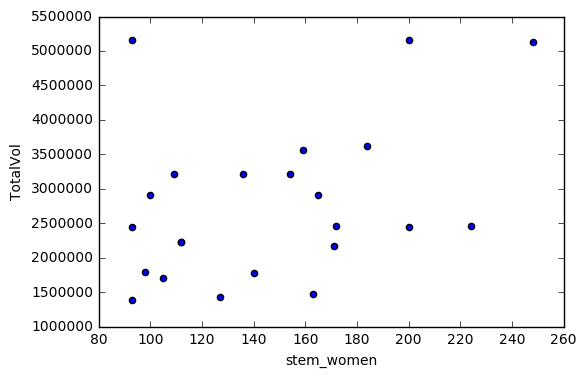

In [15]:
census_ts.plot.scatter('stem_women', 'TotalVol');

In [16]:
import seaborn as sns

/Users/rosiehoyem/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [17]:
sns.lmplot('stem_women', 'TotalVol', data=final, hue='STATION', fit_reg=False);

NameError: name 'final' is not defined

In [ ]:
final = census_ts.sort_values('comb_rank', ascending=True)
final